# Setup

In [12]:
%load_ext kedro.ipython
import pandas as pd
import numpy as np

from thefuzz import fuzz
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

The kedro.ipython extension is already loaded. To reload it, use:
  %reload_ext kedro.ipython


In [2]:
%reload_kedro
df = catalog.load("prim_mibolsillo")
df

                    INFO     Resolved project path as:                                              ]8;id=542099;file:///usr/local/Caskroom/miniforge/base/envs/kedro-environment/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=191390;file:///usr/local/Caskroom/miniforge/base/envs/kedro-environment/lib/python3.10/site-packages/kedro/ipython/__init__.py#164\164]8;;\
                             /Users/richarddegaki/repos/xrhd/brazilian-credit-card-spending.                       
                             To set a different path, run '%reload_kedro <project_root>'                           

[04/02/24 21:22:16] INFO     Kedro project Brazilian Credit Card Spending                           ]8;id=410707;file:///usr/local/Caskroom/miniforge/base/envs/kedro-environment/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=867103;file:///usr/local/Caskroom/miniforge/base/envs/kedro-environment/lib/python3.10/site-packages/kedro/ipython/__init__.py#134\134]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=16545;file:///usr/local/Caskroom/miniforge/base/envs/kedro-environment/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=105331;file:///usr/local/Caskroom/miniforge/base/envs/kedro-environment/lib/python3.10/site-packages/kedro/ipython/__init__.py#135\135]8;;\
                             'pipelines'                                                                           

                    INFO     Registered line magic 'run_viz'                                        ]8;id=998500;file:///usr/local/Caskroom/miniforge/base/envs/kedro-environment/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=804562;file:///usr/local/Caskroom/miniforge/base/envs/kedro-environment/lib/python3.10/site-packages/kedro/ipython/__init__.py#141\141]8;;\

                    INFO     Loading data from prim_mibolsillo (ParquetDataset)...              ]8;id=175224;file:///usr/local/Caskroom/miniforge/base/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=629738;file:///usr/local/Caskroom/miniforge/base/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py#483\483]8;;\

,id,branch_number,city,state,age,gender,total_credit_card_limit,current_available_limit,date,amount,category_expense,purchase_city,purchase_country,geobr_purchase_city,geobr_purchase_city_conf,geobr_purchase_state
0,"4,53E+11",201405,CAMPO LIMPO PAULISTA,SP,37,F,4700,5605,2019-12-04,31.0,SERVI‚O,SAO PAULO,BR,São Paulo,0.94,SP
1,"4,53E+11",201405,CAMPO LIMPO PAULISTA,SP,37,F,4700,5343,2019-11-09,15001.0,FARMACIAS,SANTOS,BR,Santos,1.00,SP
2,"4,53E+11",201405,CAMPO LIMPO PAULISTA,SP,37,F,4700,2829,2019-05-06,50.0,SERVI‚O,SAO PAULO,BR,São Paulo,0.94,SP
3,"4,53E+11",201405,CAMPO LIMPO PAULISTA,SP,37,F,4700,2547,2019-06-01,544.0,M.O.T.O.,OSASCO,BR,Osasco,1.00,SP
4,"4,53E+11",201405,CAMPO LIMPO PAULISTA,SP,37,F,4700,2515,2019-06-01,3279.0,M.O.T.O.,OSASCO,BR,Osasco,1.00,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4950,"9,19E+11",201910,SAO PAULO,SP,37,M,8500,5305,2020-01-23,255.0,RESTAURANTE,SAO PAULO,BR,São Paulo,0.94,SP
4951,"9,19E+11",201910,SAO PAULO,SP,37,M,8500,5266,2020-01-23,395.0,SUPERMERCADOS,SAO PAULO,BR,São Paulo,0.94,SP
4952,"9,19E+11",201910,SAO PAULO,SP,37,M,8500,5445,2020-02-19,7556.0,RESTAURANTE,SAO PAULO,BR,São Paulo,0.94,SP
4953,"9,19E+11",201910,SAO PAULO,SP,37,M,8500,5002,2020-03-30,59.0,SERVI‚O,SAO PAULO,BR,São Paulo,0.94,SP


# Feature Engineering

In [3]:
model_data = df[['total_credit_card_limit', 'current_available_limit', 'amount']] # take only numerical columns
model_data.head()

,total_credit_card_limit,current_available_limit,amount
0,4700,5605,31.0
1,4700,5343,15001.0
2,4700,2829,50.0
3,4700,2547,544.0
4,4700,2515,3279.0


In [4]:
model_data['total_minus_current'] = model_data['total_credit_card_limit'] - model_data['current_available_limit']
model_data['current_available_limit_ratio'] = model_data['current_available_limit'] / model_data['total_credit_card_limit']
model_data['amount_ratio_from_total'] = model_data['amount'] / model_data['total_credit_card_limit']
model_data['amount_ratio_from_current'] = model_data['amount'] / model_data['current_available_limit']
model_data.head()


[04/02/24 21:22:17] WARNING  /var/folders/qn/pq9pzsn51vx7lzwtkc1r1hxr0000gn/T/ipykernel_34204/30728 ]8;id=403314;file:///usr/local/Caskroom/miniforge/base/envs/kedro-environment/lib/python3.10/warnings.py\warnings.py]8;;\:]8;id=389531;file:///usr/local/Caskroom/miniforge/base/envs/kedro-environment/lib/python3.10/warnings.py#109\109]8;;\
                             33996.py:1: SettingWithCopyWarning:                                                   
                             A value is trying to be set on a copy of a slice from a DataFrame.                    
                             Try using .loc[row_indexer,col_indexer] = value instead                               
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               model_data['total_minus_current'] =                                                 
                             model_data['total_credit_card_limit'] -                                               
                             model_data['current_available_limit']                                                 
                                                                                                                   

                    WARNING  /var/folders/qn/pq9pzsn51vx7lzwtkc1r1hxr0000gn/T/ipykernel_34204/30728 ]8;id=544802;file:///usr/local/Caskroom/miniforge/base/envs/kedro-environment/lib/python3.10/warnings.py\warnings.py]8;;\:]8;id=693193;file:///usr/local/Caskroom/miniforge/base/envs/kedro-environment/lib/python3.10/warnings.py#109\109]8;;\
                             33996.py:2: SettingWithCopyWarning:                                                   
                             A value is trying to be set on a copy of a slice from a DataFrame.                    
                             Try using .loc[row_indexer,col_indexer] = value instead                               
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               model_data['current_available_limit_ratio'] =                                       
                             model_data['current_available_limit'] /                                               
                             model_data['total_credit_card_limit']                                                 
                                                                                                                   

                    WARNING  /var/folders/qn/pq9pzsn51vx7lzwtkc1r1hxr0000gn/T/ipykernel_34204/30728 ]8;id=704;file:///usr/local/Caskroom/miniforge/base/envs/kedro-environment/lib/python3.10/warnings.py\warnings.py]8;;\:]8;id=568649;file:///usr/local/Caskroom/miniforge/base/envs/kedro-environment/lib/python3.10/warnings.py#109\109]8;;\
                             33996.py:3: SettingWithCopyWarning:                                                   
                             A value is trying to be set on a copy of a slice from a DataFrame.                    
                             Try using .loc[row_indexer,col_indexer] = value instead                               
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               model_data['amount_ratio_from_total'] = model_data['amount'] /                      
                             model_data['total_credit_card_limit']                                                 
                                                                                                                   

                    WARNING  /var/folders/qn/pq9pzsn51vx7lzwtkc1r1hxr0000gn/T/ipykernel_34204/30728 ]8;id=534023;file:///usr/local/Caskroom/miniforge/base/envs/kedro-environment/lib/python3.10/warnings.py\warnings.py]8;;\:]8;id=879467;file:///usr/local/Caskroom/miniforge/base/envs/kedro-environment/lib/python3.10/warnings.py#109\109]8;;\
                             33996.py:4: SettingWithCopyWarning:                                                   
                             A value is trying to be set on a copy of a slice from a DataFrame.                    
                             Try using .loc[row_indexer,col_indexer] = value instead                               
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               model_data['amount_ratio_from_current'] = model_data['amount'] /                    
                             model_data['current_available_limit']                                                 
                                                                                                                   

,total_credit_card_limit,current_available_limit,amount,total_minus_current,current_available_limit_ratio,amount_ratio_from_total,amount_ratio_from_current
0,4700,5605,31.0,-905,1.192553,0.006596,0.005531
1,4700,5343,15001.0,-643,1.136809,3.191702,2.807599
2,4700,2829,50.0,1871,0.601915,0.010638,0.017674
3,4700,2547,544.0,2153,0.541915,0.115745,0.213585
4,4700,2515,3279.0,2185,0.535106,0.697660,1.303777


In [5]:
model_data['is_F'] = np.where(df.gender == 'F', 1, 0)
model_data['is_M'] = np.where(df.gender == 'M', 1, 0)
model_data.head()

                    WARNING  /var/folders/qn/pq9pzsn51vx7lzwtkc1r1hxr0000gn/T/ipykernel_34204/21878 ]8;id=350375;file:///usr/local/Caskroom/miniforge/base/envs/kedro-environment/lib/python3.10/warnings.py\warnings.py]8;;\:]8;id=994845;file:///usr/local/Caskroom/miniforge/base/envs/kedro-environment/lib/python3.10/warnings.py#109\109]8;;\
                             45388.py:1: SettingWithCopyWarning:                                                   
                             A value is trying to be set on a copy of a slice from a DataFrame.                    
                             Try using .loc[row_indexer,col_indexer] = value instead                               
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               model_data['is_F'] = np.where(df.gender == 'F', 1, 0)                               
                                                                                                                   

                    WARNING  /var/folders/qn/pq9pzsn51vx7lzwtkc1r1hxr0000gn/T/ipykernel_34204/21878 ]8;id=817524;file:///usr/local/Caskroom/miniforge/base/envs/kedro-environment/lib/python3.10/warnings.py\warnings.py]8;;\:]8;id=40281;file:///usr/local/Caskroom/miniforge/base/envs/kedro-environment/lib/python3.10/warnings.py#109\109]8;;\
                             45388.py:2: SettingWithCopyWarning:                                                   
                             A value is trying to be set on a copy of a slice from a DataFrame.                    
                             Try using .loc[row_indexer,col_indexer] = value instead                               
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               model_data['is_M'] = np.where(df.gender == 'M', 1, 0)                               
                                                                                                                   

,total_credit_card_limit,current_available_limit,amount,total_minus_current,current_available_limit_ratio,amount_ratio_from_total,amount_ratio_from_current,is_F,is_M
0,4700,5605,31.0,-905,1.192553,0.006596,0.005531,1,0
1,4700,5343,15001.0,-643,1.136809,3.191702,2.807599,1,0
2,4700,2829,50.0,1871,0.601915,0.010638,0.017674,1,0
3,4700,2547,544.0,2153,0.541915,0.115745,0.213585,1,0
4,4700,2515,3279.0,2185,0.535106,0.697660,1.303777,1,0


In [6]:
# model_data['is_the_same_city'] = df[['city', 'purchase_city']].apply(lambda city, purchase_city: fuzz.ratio(city, purchase_city))
model_data['is_the_same_city'] = df.apply(lambda row: fuzz.ratio(row.city, row.purchase_city)/100, axis=1)
model_data['is_the_state'] = df.apply(lambda row: fuzz.ratio(row.state, row.geobr_purchase_state)/100, axis=1)
model_data['is_the_state_conf'] = model_data['is_the_state'] * df['geobr_purchase_city_conf']
model_data.head()

                    WARNING  /var/folders/qn/pq9pzsn51vx7lzwtkc1r1hxr0000gn/T/ipykernel_34204/12606 ]8;id=635699;file:///usr/local/Caskroom/miniforge/base/envs/kedro-environment/lib/python3.10/warnings.py\warnings.py]8;;\:]8;id=639465;file:///usr/local/Caskroom/miniforge/base/envs/kedro-environment/lib/python3.10/warnings.py#109\109]8;;\
                             68859.py:2: SettingWithCopyWarning:                                                   
                             A value is trying to be set on a copy of a slice from a DataFrame.                    
                             Try using .loc[row_indexer,col_indexer] = value instead                               
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               model_data['is_the_same_city'] = df.apply(lambda row:                               
                             fuzz.ratio(row.city, row.purchase_city)/100, axis=1)                                  
                                                                                                                   

[04/02/24 21:22:18] WARNING  /var/folders/qn/pq9pzsn51vx7lzwtkc1r1hxr0000gn/T/ipykernel_34204/12606 ]8;id=379717;file:///usr/local/Caskroom/miniforge/base/envs/kedro-environment/lib/python3.10/warnings.py\warnings.py]8;;\:]8;id=542815;file:///usr/local/Caskroom/miniforge/base/envs/kedro-environment/lib/python3.10/warnings.py#109\109]8;;\
                             68859.py:3: SettingWithCopyWarning:                                                   
                             A value is trying to be set on a copy of a slice from a DataFrame.                    
                             Try using .loc[row_indexer,col_indexer] = value instead                               
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               model_data['is_the_state'] = df.apply(lambda row:                                   
                             fuzz.ratio(row.state, row.geobr_purchase_state)/100, axis=1)                          
                                                                                                                   

                    WARNING  /var/folders/qn/pq9pzsn51vx7lzwtkc1r1hxr0000gn/T/ipykernel_34204/12606 ]8;id=653234;file:///usr/local/Caskroom/miniforge/base/envs/kedro-environment/lib/python3.10/warnings.py\warnings.py]8;;\:]8;id=27128;file:///usr/local/Caskroom/miniforge/base/envs/kedro-environment/lib/python3.10/warnings.py#109\109]8;;\
                             68859.py:4: SettingWithCopyWarning:                                                   
                             A value is trying to be set on a copy of a slice from a DataFrame.                    
                             Try using .loc[row_indexer,col_indexer] = value instead                               
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               model_data['is_the_state_conf'] = model_data['is_the_state'] *                      
                             df['geobr_purchase_city_conf']                                                        
                                                                                                                   

,total_credit_card_limit,current_available_limit,amount,total_minus_current,current_available_limit_ratio,amount_ratio_from_total,amount_ratio_from_current,is_F,is_M,is_the_same_city,is_the_state,is_the_state_conf
0,4700,5605,31.0,-905,1.192553,0.006596,0.005531,1,0,0.48,1.0,0.94
1,4700,5343,15001.0,-643,1.136809,3.191702,2.807599,1,0,0.23,1.0,1.00
2,4700,2829,50.0,1871,0.601915,0.010638,0.017674,1,0,0.48,1.0,0.94
3,4700,2547,544.0,2153,0.541915,0.115745,0.213585,1,0,0.23,1.0,1.00
4,4700,2515,3279.0,2185,0.535106,0.697660,1.303777,1,0,0.23,1.0,1.00


# Labels

Due to the significant imbalance in label counts, I opted for a more meaningful grouping approach: grouping by purpose. Here's the breakdown:

- Necessities: SERVI‚O, SUPERMERCADOS, FARMACIAS, POSTO DE GAS, M.O.T.O.
- Discretionary: RESTAURANTE, VAREJO, VESTUARIO, ARTIGOS ELETRO, MOVEIS E DECOR, AUTO PE‚AS, JOALHERIA
- Travel: CIA AEREAS, HOTEIS, AGENCIA DE TUR"

In [7]:
df['category_expense'].value_counts()


category_expense
SERVI‚O           1769
RESTAURANTE        871
VAREJO             599
SUPERMERCADOS      468
VESTUARIO          236
FARMACIAS          222
POSTO DE GAS       199
M.O.T.O.           177
ARTIGOS ELETRO     122
LOJA DE DEPART      80
CIA AEREAS          36
HOTEIS              24
HOSP E CLINICA      18
SEM RAMO            16
MOVEIS E DECOR      15
MAT CONSTRUCAO      15
AUTO PE‚AS          14
AGENCIA DE TUR      12
JOALHERIA            6
ALUG DE CARROS       1
Name: count, dtype: int64

In [8]:
%reload_kedro

                    INFO     Resolved project path as:                                              ]8;id=631200;file:///usr/local/Caskroom/miniforge/base/envs/kedro-environment/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=207076;file:///usr/local/Caskroom/miniforge/base/envs/kedro-environment/lib/python3.10/site-packages/kedro/ipython/__init__.py#164\164]8;;\
                             /Users/richarddegaki/repos/xrhd/brazilian-credit-card-spending.                       
                             To set a different path, run '%reload_kedro <project_root>'                           

[04/02/24 21:22:19] INFO     Kedro project Brazilian Credit Card Spending                           ]8;id=16417;file:///usr/local/Caskroom/miniforge/base/envs/kedro-environment/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=902874;file:///usr/local/Caskroom/miniforge/base/envs/kedro-environment/lib/python3.10/site-packages/kedro/ipython/__init__.py#134\134]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=700017;file:///usr/local/Caskroom/miniforge/base/envs/kedro-environment/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=936952;file:///usr/local/Caskroom/miniforge/base/envs/kedro-environment/lib/python3.10/site-packages/kedro/ipython/__init__.py#135\135]8;;\
                             'pipelines'                                                                           

                    INFO     Registered line magic 'run_viz'                                        ]8;id=643713;file:///usr/local/Caskroom/miniforge/base/envs/kedro-environment/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=50211;file:///usr/local/Caskroom/miniforge/base/envs/kedro-environment/lib/python3.10/site-packages/kedro/ipython/__init__.py#141\141]8;;\

In [9]:
expense_groups = catalog.load("params:expense_groups")
display(expense_groups)

# Create a function to assign labels based on expense groups
def assign_label(expense):
    for group, labels in expense_groups.items():
        if expense in labels:
            return group
    return "Other"

model_data['label'] = df['category_expense'].apply(assign_label)
model_data.label.value_counts()

                    INFO     Loading data from params:expense_groups (MemoryDataset)...         ]8;id=108919;file:///usr/local/Caskroom/miniforge/base/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=845100;file:///usr/local/Caskroom/miniforge/base/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py#483\483]8;;\


{
    'Necessities': ['SERVI‚O', 'SUPERMERCADOS', 'FARMACIAS', 'POSTO DE GAS', 'M.O.T.O.'],
    'Discretionary': [
        'RESTAURANTE',
        'VAREJO',
        'VESTUARIO',
        'ARTIGOS ELETRO',
        'MOVEIS E DECOR',
        'AUTO PE‚AS',
        'JOALHERIA'
    ],
    'Travel': ['CIA AEREAS', 'HOTEIS', 'AGENCIA DE TUR']
}

                    WARNING  /var/folders/qn/pq9pzsn51vx7lzwtkc1r1hxr0000gn/T/ipykernel_34204/97070 ]8;id=544962;file:///usr/local/Caskroom/miniforge/base/envs/kedro-environment/lib/python3.10/warnings.py\warnings.py]8;;\:]8;id=586783;file:///usr/local/Caskroom/miniforge/base/envs/kedro-environment/lib/python3.10/warnings.py#109\109]8;;\
                             2585.py:11: SettingWithCopyWarning:                                                   
                             A value is trying to be set on a copy of a slice from a DataFrame.                    
                             Try using .loc[row_indexer,col_indexer] = value instead                               
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               model_data['label'] = df['category_expense'].apply(assign_label)                    
                                                                                                                   


label
Necessities      2835
Discretionary    1863
Other             130
Travel             72
Name: count, dtype: int64

# Visualization

In [4]:
%reload_kedro
df = catalog.load("model_data")
df

                    INFO     Resolved project path as:                                              ]8;id=261152;file:///usr/local/Caskroom/miniforge/base/envs/kedro-environment/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=84940;file:///usr/local/Caskroom/miniforge/base/envs/kedro-environment/lib/python3.10/site-packages/kedro/ipython/__init__.py#164\164]8;;\
                             /Users/richarddegaki/repos/xrhd/brazilian-credit-card-spending.                       
                             To set a different path, run '%reload_kedro <project_root>'                           

[04/02/24 21:24:11] INFO     Kedro project Brazilian Credit Card Spending                           ]8;id=5158;file:///usr/local/Caskroom/miniforge/base/envs/kedro-environment/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=425252;file:///usr/local/Caskroom/miniforge/base/envs/kedro-environment/lib/python3.10/site-packages/kedro/ipython/__init__.py#134\134]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=161373;file:///usr/local/Caskroom/miniforge/base/envs/kedro-environment/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=491090;file:///usr/local/Caskroom/miniforge/base/envs/kedro-environment/lib/python3.10/site-packages/kedro/ipython/__init__.py#135\135]8;;\
                             'pipelines'                                                                           

                    INFO     Registered line magic 'run_viz'                                        ]8;id=907930;file:///usr/local/Caskroom/miniforge/base/envs/kedro-environment/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=704879;file:///usr/local/Caskroom/miniforge/base/envs/kedro-environment/lib/python3.10/site-packages/kedro/ipython/__init__.py#141\141]8;;\

                    INFO     Loading data from model_data (ParquetDataset)...                   ]8;id=659168;file:///usr/local/Caskroom/miniforge/base/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=814632;file:///usr/local/Caskroom/miniforge/base/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py#483\483]8;;\

,total_credit_card_limit,current_available_limit,amount,total_minus_current,current_available_limit_ratio,amount_ratio_from_total,amount_ratio_from_current,is_F,is_M,is_the_same_city,is_the_state,is_the_state_conf,label
0,4700,5605,31.0,-905,1.192553,0.006596,0.005531,1,0,0.48,1.0,0.94,Necessities
1,4700,5343,15001.0,-643,1.136809,3.191702,2.807599,1,0,0.23,1.0,1.00,Necessities
2,4700,2829,50.0,1871,0.601915,0.010638,0.017674,1,0,0.48,1.0,0.94,Necessities
3,4700,2547,544.0,2153,0.541915,0.115745,0.213585,1,0,0.23,1.0,1.00,Necessities
4,4700,2515,3279.0,2185,0.535106,0.697660,1.303777,1,0,0.23,1.0,1.00,Necessities
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4950,8500,5305,255.0,3195,0.624118,0.030000,0.048068,0,1,1.00,1.0,0.94,Discretionary
4951,8500,5266,395.0,3234,0.619529,0.046471,0.075009,0,1,1.00,1.0,0.94,Necessities
4952,8500,5445,7556.0,3055,0.640588,0.888941,1.387695,0,1,1.00,1.0,0.94,Discretionary
4953,8500,5002,59.0,3498,0.588471,0.006941,0.011795,0,1,1.00,1.0,0.94,Necessities


In [10]:
min_df = df[['total_minus_current', 'current_available_limit_ratio', 'is_the_state_conf', 'is_the_same_city', 'label']].sample(100, random_state=0)
min_df

,total_minus_current,current_available_limit_ratio,is_the_state_conf,is_the_same_city,label
3340,2637,0.023333,0.94,1.0,Discretionary
1148,441,0.632500,0.94,1.0,Discretionary
4467,416,0.168000,0.94,1.0,Necessities
3122,1598,0.500625,0.94,1.0,Discretionary
2547,1337,0.966575,0.00,0.4,Travel
...,...,...,...,...,...
2728,-166,1.030182,0.94,1.0,Necessities
381,-441,1.080182,0.94,0.4,Necessities
149,2633,0.307105,0.94,1.0,Necessities
3315,3355,0.161250,0.94,1.0,Discretionary


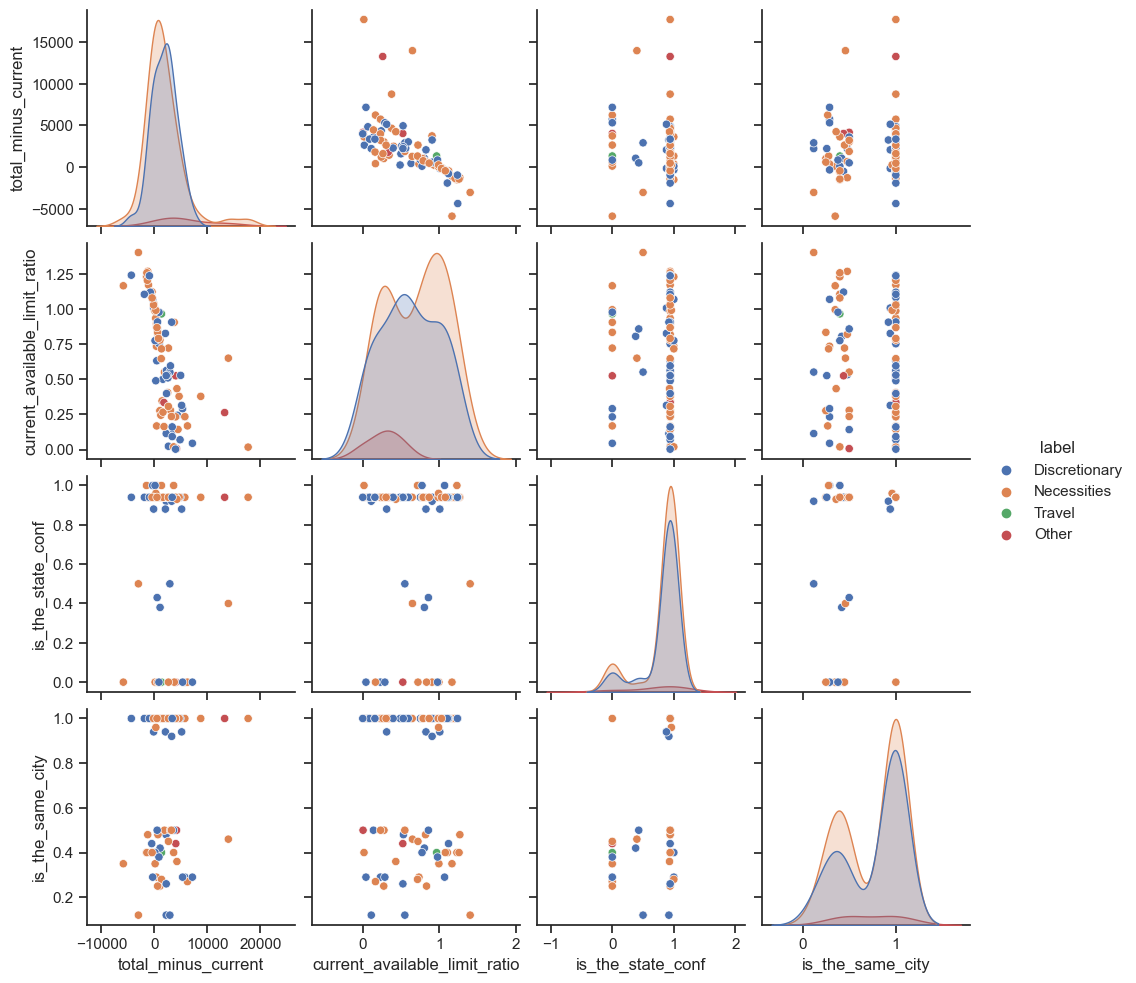

In [13]:
sns.set_theme(style="ticks")
sns.pairplot(min_df, hue="label")